In [ ]:
import sys
import os

# Add the 'src' directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', 'src')))

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.


/Users/damyr.zaichenko/Programs/GitHub/knu-ts-hackaton/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded PyTorch TimesFM, likely because python version is 3.10.16 (main, Dec  3 2024, 17:27:57) [Clang 16.0.0 (clang-1600.0.26.4)].


Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 101803.50it/s]


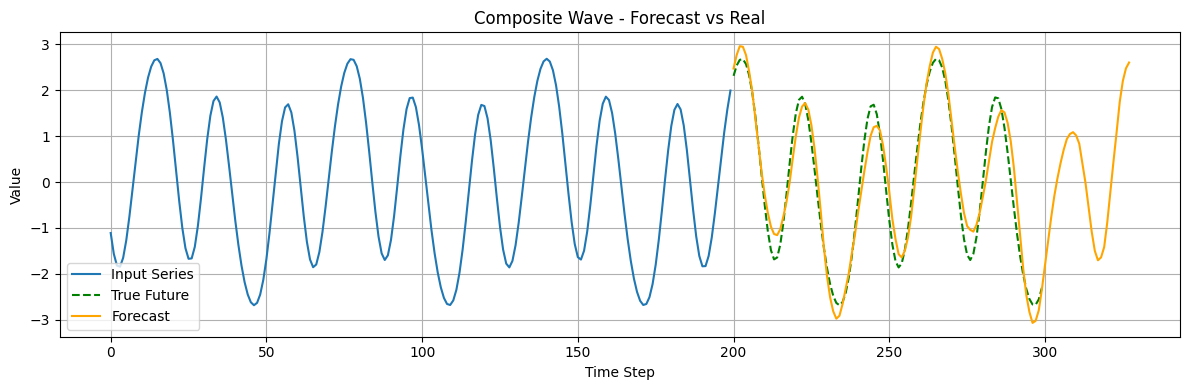

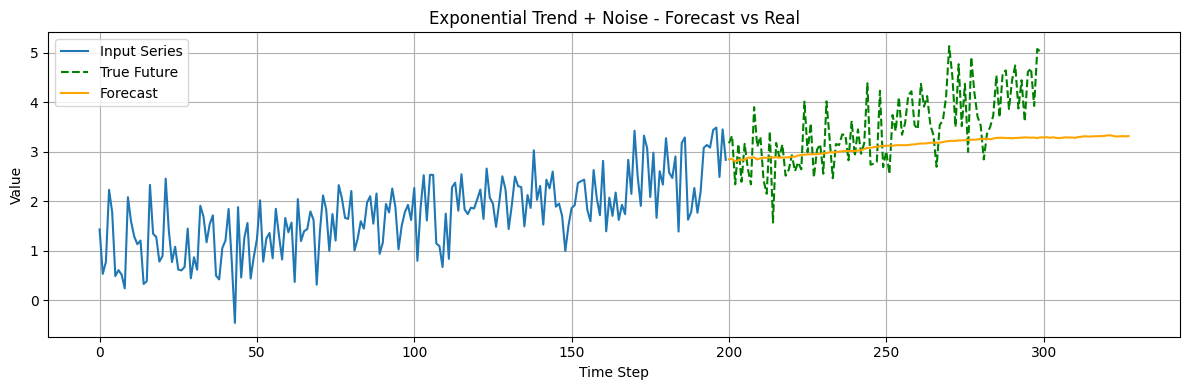

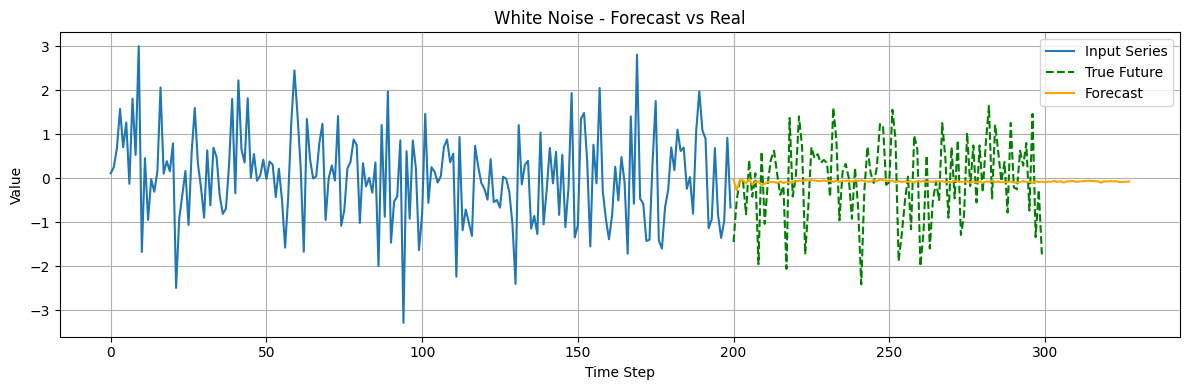

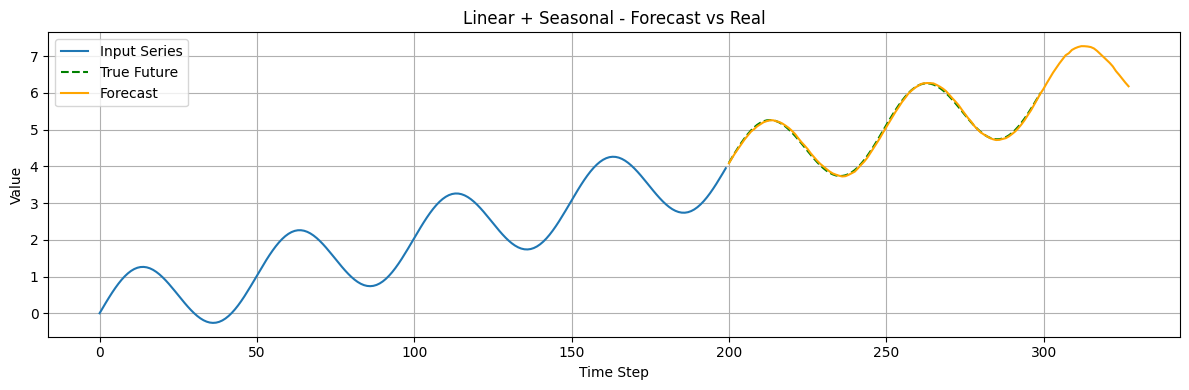

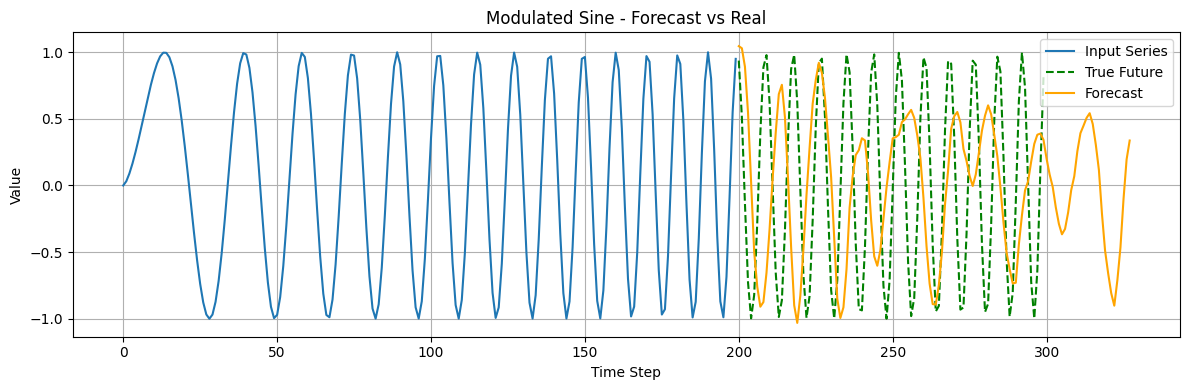

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from model_loader import load_timesfm_model

# Load the model
tfm = load_timesfm_model()

# Test functions
def func_1(x):
    # Damped composite wave
    return np.sin(x) + 2 * np.cos(3 * x + 2) + (1/3) * np.cos(-5 * x + 10)

def func_2(x):
    # Exponential trend with noise
    return np.exp(0.05 * x) + np.random.normal(0, 0.5, size=len(x))

def func_3(x):
    # White noise
    return np.random.normal(0, 1, size=len(x))

def func_4(x):
    # Linear trend with seasonal signal
    return 0.2 * x + np.sin(2 * np.pi * x / 5)

def func_5(x):
    # Chaotic-like pattern (modulated sine)
    return np.sin(x ** 1.5)

functions = [func_1, func_2, func_3, func_4, func_5]
titles = [
    "Composite Wave",
    "Exponential Trend + Noise",
    "White Noise",
    "Linear + Seasonal",
    "Modulated Sine"
]

# Forecasting parameters
x_full = np.linspace(0, 30, 300)
history_len = 200
forecast_len = 100
frequency_input = [0]  # Daily-like frequency

# Run forecast for each function
for i, (func, title) in enumerate(zip(functions, titles)):
    y_full = func(x_full)
    forecast_input = [y_full[:history_len]]
    true_future = [y_full[history_len:history_len + forecast_len]]
    point_forecast, _ = tfm.forecast(forecast_input, freq=frequency_input)

    # Plot results
    for hist, forecast, actual in zip(forecast_input, point_forecast, true_future):
        plt.figure(figsize=(12, 4))
        plt.plot(range(len(hist)), hist, label="Input Series")
        plt.plot(range(len(hist), len(hist) + len(actual)), actual, label="True Future", linestyle='--', color='green')
        plt.plot(range(len(hist), len(hist) + len(forecast)), forecast, label="Forecast", color="orange")
        plt.title(f"{title} - Forecast vs Real")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()